In [1]:
from utils.loader import load_model
from utils.utils import cv2img_to_pil
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
cropper, detector, reader = load_model()

# Cropper

Text(0.5, 1.0, 'Raw input')

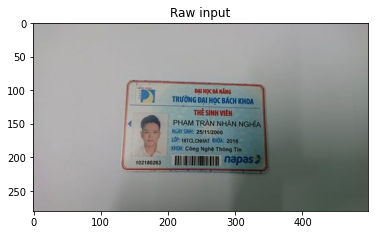

In [3]:
img_path = "./test_img/12mp16.9.jpg"
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title("Raw input")

Wall time: 32.9 ms


Text(0.5, 1.0, 'Aligned Image')

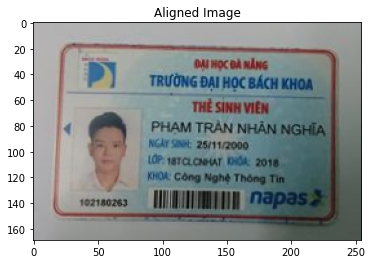

In [4]:
%%time
cropped_img = cropper.predict(img,img_path=None, resize=True)
# cropped_img = cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB)
plt.imshow(cropped_img)
plt.title("Aligned Image")

# Detector

Wall time: 2.8 s


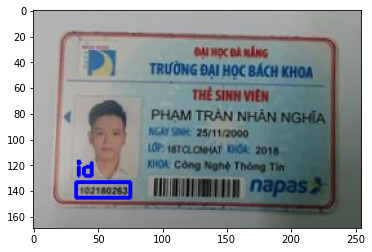

In [5]:
%%time
try:
    id_only_img, annotated_img = detector.predict(cropped_img)
    plt.imshow(annotated_img)
except:
    print("No object found!")

Text(0.5, 1.0, 'MSSV')

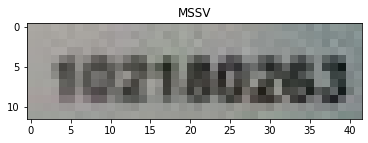

In [6]:
plt.imshow(id_only_img)
plt.title("MSSV")

# Reader

In [7]:
%%time
s = reader.predict(cv2img_to_pil(id_only_img))
s

Wall time: 244 ms


'102180263'